# Wine quality
[...]
Author: Albert Wildeman

CHECKS
- do not load unnecessary libraries

#JOIN DATASETS OR NOT? talk:
- A. all together, extra binary variable for red/white
- B. all separate (because requirements different for each - valid to try this first and see how similar models are)
- C. Bayesian hierarchical. Just 2 types is not much; would make more sense with say 4+

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import scipy.stats as st
import copy
from IPython.display import display

# SKLearn
from sklearn import decomposition, preprocessing, ensemble, svm, metrics
from sklearn.model_selection import cross_val_score, train_test_split

#from sklearn import linear_model, ensemble, svm, neighbors, preprocessing
#from sklearn.model_selection import cross_val_score

# Graphics
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

# Set random seed for reproducibility
np.random.seed(0)

# Load data

In [2]:
clrs  = ['red', 'white']
n_clrs = len(clrs)
dfs = [ pd.read_csv("data/winequality-" + clr + ".csv", sep = ';') for clr in clrs]

In [3]:
# See if the columns are identical for red and white wine
dfs[0].columns.identical(dfs[1].columns)

True

In [4]:
# Inspect the column names
dfs[0].columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# Generate list of features
feats = dfs[0].drop('quality', axis=1).columns.values
# Get number of features &  (for each color) observations
n_feats = len(feats)
n_obs = [df.shape[0] for df in dfs]

In [6]:
# Determine how many missing values there are
for i_clr, clr in enumerate(clrs):
    print('Missing values in ' + clr + ' wine data: ' + str(dfs[i_clr].isnull().sum().sum()))

Missing values in red wine data: 0
Missing values in white wine data: 0


In [7]:
# None! great news.

## Distribution of quality ratings


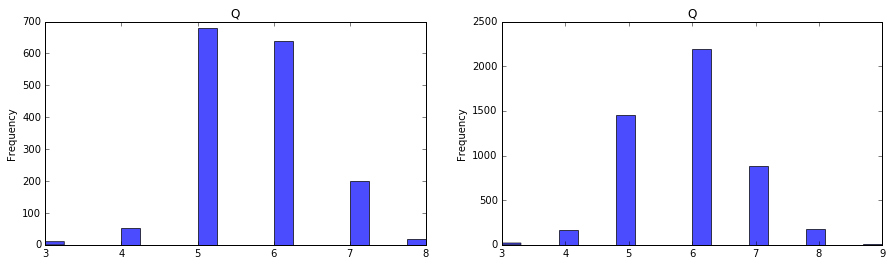

In [8]:
fig = plt.figure(figsize=(15,4))
for i_clr, df in enumerate(dfs):
    ax = plt.subplot2grid((1,2),(0,i_clr))
    #cv_svr.plot(title = "Cross-validation for penalty parameter selection", alpha=0.7, lw=3)
    #plt.xlabel("penalty parameter"); plt.ylabel("MSE") 
    
    df.quality.plot(kind='hist', color='blue', label='Sale Price', bins=20, alpha=0.7)    
    plt.title('Q')

# Log scaling
Inspect distributions of all variables, primarily for normality and outliers.

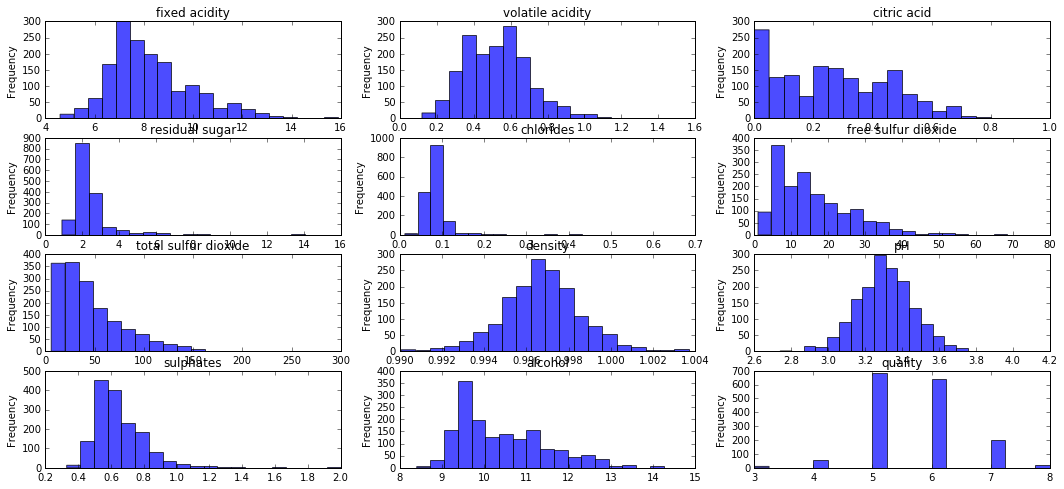

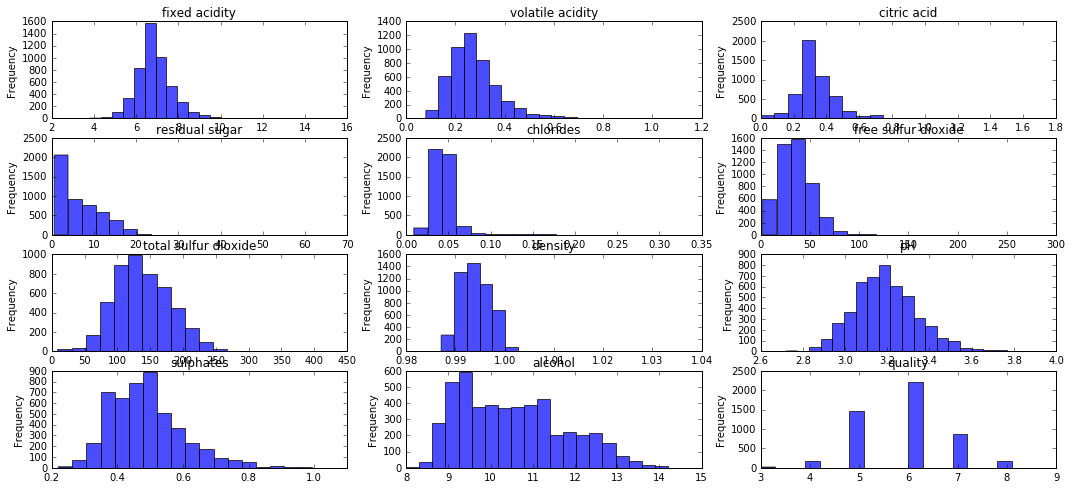

In [30]:
# Diplay histogram of sale prices
for df in dfs:
    fig = plt.figure(figsize=(18,8))
    for i_col, col in enumerate(df.columns.values):
        
        ax = plt.subplot2grid((4,3),divmod(i_col,3))
        df[col].plot(kind='hist', color='blue', label='Sale Price', bins=20, alpha=0.7)    
        plt.title(col)

Make remark about no (extreme) outliers

In [9]:
# Diplay histogram of sale prices
#for df in dfs:
    # automatically pick features to log-transform
    #skewed_feats = [ft for ft in feats if st.skew(df[ft].dropna())>.75]
    #display(skewed_feats)

# Set features to log-transform
skewed_feats = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
       'sulphates', 'alcohol']

# log transform

for df in dfs:
    df[skewed_feats] = np.log1p(df[skewed_feats])
    display(df['fixed acidity'][0])


# Diplay histogram of sale prices
for df in dfs:
    fig = plt.figure(figsize=(18,8))
    for i_col, col in enumerate(df.columns.values):
        
        ax = plt.subplot2grid((4,3),divmod(i_col,3))
        df[col].plot(kind='hist', color='blue', label='Sale Price', bins=20, alpha=0.7)    
        plt.title(col)

## Normalization: mean-centering and variance scaling
One of the benefits of normalization is that it allows regularized linear models such as Lasso or Ridge Regression to penalize the various feautures evenly.

In [10]:
X = [preprocessing.StandardScaler().fit_transform(df.drop('quality', axis=1)) for df in dfs]

# Prep data for ML
Split into training (2/3) and test (1/3) sets, and create feature matrices and target vectors as separate entities.

In [11]:
# target vector
y = [df.quality for df in dfs]

# Split into training and test sets
X_trn = [None]*n_clrs; y_trn_multicl = [None]*n_clrs; 
X_tst = [None]*n_clrs; y_tst_multicl = [None]*n_clrs

for i_clr in range(n_clrs):
    X_trn[i_clr], X_tst[i_clr], y_trn_multicl[i_clr], y_tst_multicl[i_clr] = train_test_split(
                                                                         X[i_clr], y[i_clr], test_size=0.33, random_state=1)
# Derive poor and excellent target vectors
y_trn = [[((yy>7)*1).values for yy in y_trn_multicl], 
         [((yy<5)*1).values for yy in y_trn_multicl],]
y_tst = [[((yy>7)*1).values for yy in y_tst_multicl], 
         [((yy<5)*1).values for yy in y_tst_multicl],]

criteria = ['excellent', 'poor']
n_criteria = len(criteria)

# Visual feature selection

In [ ]:
i_clr = 0
# Diplay histogram of sale prices
fig = plt.figure(figsize=(18,8))
for i_feat, feat in feats:
        
    ax = plt.subplot2grid((4,3),divmod(i_col,3))
    
    #df[col].plot(kind='hist', color='blue', label='Sale Price', bins=20, alpha=0.7)    
    
    #colors = ['red', 'tan', 'lime']
    hist_data = X_trn[i_clr][??]
    
    ax.hist(hist_data, 20, normed=1, histtype='bar', color=colors, label=colors)
    ax.legend(prop={'size': 10})
    ax.set_title('bars with legend')
    
    
    plt.title(clrs[i_clr])

In [12]:
# Make copies of excellent and poor wines
ye_trn = copy.deepcopy(y_trn)
Xe_trn =[copy.deepcopy(X_trn), copy.deepcopy(X_trn)]
target_ratio = 1
for i_crit in range(1):
    for i_clr in range(1): 
        n_targets = int(sum(y_trn[i_crit][i_clr]))
        n_non_targets = len(y_trn[i_crit][i_clr]) - n_targets
        n_copies = int(target_ratio * (n_non_targets/n_targets)) -1
        # extend y
        ye_trn[i_crit][i_clr] = np.concatenate((ye_trn[i_crit][i_clr], np.ones(n_targets * n_copies)))
        # extend x
        idx_targets = np.where(y_trn[i_crit][i_clr]==1)
        for i_copy in range(n_copies):
            Xe_trn[i_crit][i_clr] = np.concatenate((Xe_trn[i_crit][i_clr], Xe_trn[i_crit][i_clr][idx_targets]))

    

# Feature-selecting SVM



In [27]:
def select_features(X, y, n_drops, C):
    for i_drop in range(n_drops):
    #        print('dropping feat # ', i_drop)
    #        print(remaining_fts)
        n_fts = X.shape[1]
        remaining_fts = np.arange(n_fts).tolist()
    
        drop_candidate = remaining_fts[0]
        candidate_score = -1
        for i_ft in remaining_fts:
            fts = remaining_fts.copy()
            fts.remove(i_ft)

            score = cross_val_score(svm.SVC(C = C), X[:,fts], y, scoring="f1").mean()
    #            print(i_ft, cv_score, candidate_score)
            if score > candidate_score:
                drop_candidate = i_ft
                candidate_score = score
            #scores_by_n_feat[n_feats-i_drop] = 
    #        print(drop_candidate)
    return remaining_fts

def nested_CV(X, y, C_vals):
    C = 100
    n_fts = X.shape[1]
    remaining_fts = np.arange(n_fts).tolist()
     
    accuracy_n_fts_selected = np.zeros(n_fts)    
    for n_fts_selected in range(n_fts):
                
        n_drops = n_fts - n_fts_selected
        
        k=2
        n_obs = len(y)
        folds = np.random.choice(k, n_obs)
        accuracy = np.zeros(k)
        for i_fold in range(k):
            trn = folds!=i_fold
            tst = folds==i_fold
            selected_fts = select_features(X[trn,:], y[trn], n_drops, C)
            svc = svm.SVC(C=C)
            I,J=np.ix_(trn, selected_fts) ############################# FIX/alter this
            svc.fit(X[I,J], y[trn])
            I,J=np.ix_(tst, selected_fts) ############################# FIX/alter this
            y_pred = svc.predict(X[I,J])
            accuracy[i_fold] = metrics.cohen_kappa_score(y[tst], y_pred)
            
        accuracy_n_fts_selected[n_fts_selected] = accuracy.mean()

    return accuracy_n_fts_selected #.argmax()

In [15]:
feats

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], dtype=object)

i_clr = 0
C = 100
    
remaining_feats = np.arange(n_feats).tolist()
for n_drop in range(n_feats-1):
    print('dropping feat # ', n_drop)
    print(remaining_feats)
    drop_candidate = remaining_feats[0]
    candidate_score = -1
    for i_feat in remaining_feats:
        feats = remaining_feats.copy()
        feats.remove(i_feat)
        cv_score = cross_val_score(svm.SVC(C = C), X_trn[i_clr][:,feats], 
                                        y_trn[i_clr], scoring="accuracy", cv = 5).mean()
        print(i_feat, cv_score, candidate_score)
        if cv_score > candidate_score:
            drop_candidate = i_feat
            candidate_score = cv_score
    
    #scores_by_n_feat[n_feats-n_drop] = 
    print(drop_candidate)
    remaining_feats.remove(drop_candidate)
    
    

# ML

In [16]:
# This function is used to generate CV MSEs for parameter selection, and is based on Alexandru Papiu's public notebook.
def acc_cv(model, X, y):
    acc= cross_val_score(model, X, y, scoring="accuracy", cv = 10)
    return(acc)

## SVM

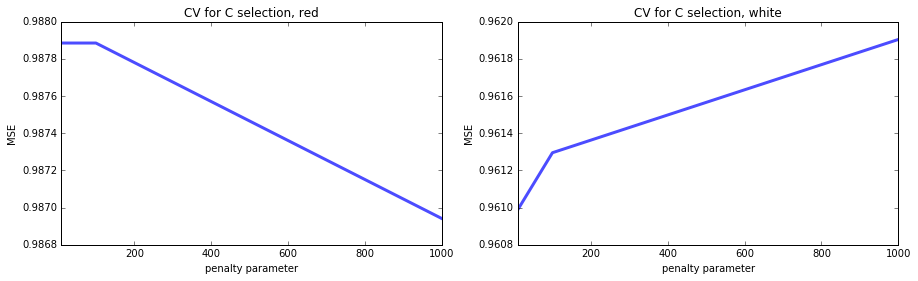

In [17]:
# Calculate CV MSE for a range of penalty parameter values
fig = plt.figure(figsize=(15,4))
for i_clr in range(n_clrs):
    cs = [10, 100, 1000]
    cv_svr = [acc_cv(svm.SVC(C = c, kernel='rbf'), X_trn[i_clr][:,[5, 9]], y_trn[0][i_clr]).mean() for c in cs]
    cv_svr = pd.Series(cv_svr, index = cs)
    ax = plt.subplot2grid((1,2),(0, i_clr))
    cv_svr.plot(title = ("CV for C selection, " + clrs[i_clr]), alpha=0.7, lw=3)
    plt.xlabel("penalty parameter"); plt.ylabel("MSE")

In [18]:
C = [100, 100]

y_pred = [None]*n_clrs;
for i_clr in range(n_clrs):
    # Fit & Predict
    y_pred[i_clr] = svm.SVC(C = C[i_clr]).fit(X_trn[i_clr][:,[5, 9]], y_trn[0][i_clr]).predict(X_tst[i_clr][:,[5, 9]])
    
    # scores
    display(metrics.confusion_matrix(y_tst[0][i_clr], y_pred[i_clr].round()))
    display(sum(abs(y_tst[0][i_clr] - y_pred[i_clr])>0) / len( y_pred[i_clr]))

array([[523,   0],
       [  5,   0]])

0.00946969696969697

array([[1563,    1],
       [  52,    1]])

0.032776747062461351

In [19]:
C = [100, 100]

y_pred = [None]*n_clrs;
for i_clr in range(n_clrs):
    # Fit & Predict
    y_pred[i_clr] = svm.SVC(C = C[i_clr]).fit(X_trn[i_clr][:,], y_trn[0][i_clr]).predict(X_tst[i_clr][:,])
    
    # scores
    display(metrics.confusion_matrix(y_tst[0][i_clr], y_pred[i_clr].round()))
    display(sum(abs(y_tst[0][i_clr] - y_pred[i_clr])>0) / len( y_pred[i_clr]))

array([[517,   6],
       [  5,   0]])

0.020833333333333332

array([[1533,   31],
       [  35,   18]])

0.040816326530612242

In [20]:

# Confusion matrix
for i_clr in range(n_clrs):
    display(metrics.confusion_matrix(y_tst[i_clr], y_pred[i_clr].round()))
    display(sum(abs(y_tst[i_clr] - y_pred[i_clr].round())>0) / len( y_pred[i_clr]))

ValueError: Found input variables with inconsistent numbers of samples: [2, 528]